In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
%matplotlib inline

In [80]:
#This function is to generate the center 
def generate_center(n=20,mu1=(0,1),mu2=(1,0),sigma=0.5):
    center_1 = np.random.normal(size=(int(n/2),2),loc=mu1)
    center_2 = np.random.normal(size=(int(n/2),2),loc=mu2)
    center = np.vstack((center_1,center_2))
    return center
    
def generate_data(n_size=200,mu1=(0,1),mu2=(1,0),sigma=0.5):
    x_train_class_0 = np.random.normal(size=((int(n_size/2)),2),loc=mu1,scale=sigma)
    x_train_class_1 = np.random.normal(size=((int(n_size/2)),2),loc=mu2,scale=sigma)
    y_train_class_0 = [0]*int(n_size/2)
    y_train_class_1 = [1]*int(n_size/2)
    x_train = np.concatenate((x_train_class_0,x_train_class_1))
    y_train = np.concatenate((y_train_class_0,y_train_class_1))
    return x_train,y_train

def plot_data(x_train,n=100,mu1=(0,1),mu2=(1,0)):
    plt.figure(figsize=(8,6))
    plt.scatter(x_train[:n,0],x_train[:n,1],label = "Class 0",alpha = 0.3)
    plt.scatter(x_train[n:,0],x_train[n:,1],label = "Class 1",alpha = 0.3)
    plt.scatter(mu1[0],mu1[1],marker="+",color="blue",s=200)
    plt.scatter(mu2[0],mu2[1],marker="+",color="red",s=200)
    plt.legend()
    plt.show()
    
def train_linear_mode(x_train,y_train):
    lin_reg = LinearRegression()
    lin_reg.fit(x_train,y_train)
    
def linear_model_predict(data,model):
    y_predict_val = lin_reg.predict(data)
    y_pred = [1 if i >= 0.5 else 0 for i in y_predict_val]
    return y_pred


def bayes_predict(data, mu1=(0,1),mu2=(1,0)):
    bayes_val = 2*np.dot(data, np.subtract(mu2, mu1)) - (np.dot(mu2, mu2) - np.dot(mu1, mu2))
    bayes_pred = [i > 0 for i in bayes_val]
    return bayes_pred
    
def eror_cal(y_true,y_predict):
    n = pd.Series(y_predict).shape[0]
    lin_error = np.sum(y_true != y_predict)/n
    return lin_error    
    
def plot_boxplot(data,labels,title = "Box Plot"):
    fig1, ax1 = plt.subplots()
    ax1.set_title(title)
    ax1.boxplot(data,labels=labels)
    plt.show()

In [79]:
center[np.random.randint(10,20),:]

array([-0.31488045, -0.1591189 ])

Random for Mu1 :2, Mu2: 17
Iteration : 0 Linear Error : Train : 0.005 : Test: 0.0048
Iteration : 0 Bayes Error  : Train : 0.005 : Test: 0.0058
Iteration : 0 Linear Quad Error : Train : 0.005 : Test: 0.0047


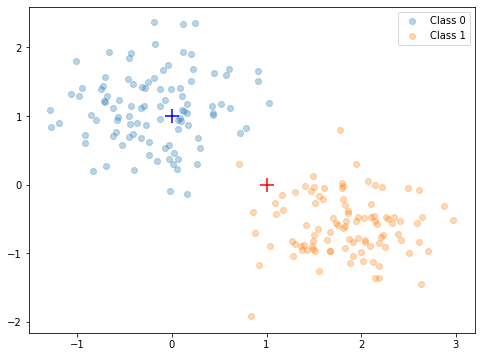

In [129]:
#Set the Seed to have consistent output for all Runs
np.random.seed(11041977) 
num_iteration = 1
num_center = 20
lin_error = np.zeros([20,2])
bayes_lin_error = np.zeros([20,2])
lin_quad_error = np.zeros([20,2])
bayes_lin_quad_error = np.zeros([20,2])
print_ind = True

#Generate the 20 Centers
center = generate_center(num_center)

#Loop through the 20 iterations to generate 20 Train / Test Samples
for i in np.arange(num_iteration):
    #Generate random number between 1 & 10 (mean = (0,1))
    rand_mu1 = np.random.randint(1,10)
    #Generate random number between 1 & 10 (mean = (1,0))
    rand_mu2 = np.random.randint(11,20)
    
    if (print_ind):
        print ("Random for Mu1 :{}, Mu2: {}".format(rand_mu1,rand_mu2))
    
    #Retrieve the data from the center from the random number
    center_mu1 = center[rand_mu1,:]
    center_mu2 = center[rand_mu2,:]
    
    #Generate the Train & Test Data based on the Center
    x_train,y_train = generate_data(n_size=200,mu1=center_mu1,mu2=center_mu2)
    x_test,y_test = generate_data(n_size=10000,mu1=center_mu1,mu2=center_mu2)
    
    #Generate the Quadratic Feature
    x_train_qudratic = np.hstack((x_train,(x_train[:,0]**2).reshape(x_train.shape[0],1),(x_train[:,1]**2).reshape(x_train.shape[0],1),(x_train[:,0]*x_train[:,1]).reshape(x_train.shape[0],1)))
    x_test_quadratic = np.hstack((x_test,(x_test[:,0]**2).reshape(x_test.shape[0],1),(x_test[:,1]**2).reshape(x_test.shape[0],1),(x_test[:,0]*x_test[:,1]).reshape(x_test.shape[0],1)))
    
    #plot_train_data(x_train)
    if (False):
        print ("Data For Train: {}".format(x_train[:2,:]))
        print ("Data For Test: {}".format(x_test[:2,:]))

    #Linear Regression Prediction (Non Quadrtic)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train,y_train)
    y_train_pred = linear_model_predict(data=x_train,model = lin_reg)
    y_test_pred = linear_model_predict(data=x_test,model = lin_reg)
    lin_error_train = eror_cal(y_train,y_train_pred)
    lin_error_test = eror_cal(y_test,y_test_pred)
    lin_error[i,0] = lin_error_train
    lin_error[i,1] = lin_error_test
    
    #Linear Regression Prediction (Quadratic)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train_qudratic,y_train)
    y_train_pred = linear_model_predict(data=x_train_qudratic,model = lin_reg)
    y_test_pred = linear_model_predict(data=x_test_quadratic,model = lin_reg)
    lin_quad_error_train = eror_cal(y_train,y_train_pred)
    lin_quad_error_test = eror_cal(y_test,y_test_pred)
    lin_quad_error[i,0] = lin_quad_error_train
    lin_quad_error[i,1] = lin_quad_error_test
    
    #Bayes Prediction (Non Quadratic)
    y_train_pred = bayes_predict(data=x_train)
    y_test_pred = bayes_predict(data=x_test)
    bayes_error_train = eror_cal(y_train,y_train_pred)
    bayes_error_test = eror_cal(y_test,y_test_pred)
    bayes_lin_error[i,0] = bayes_error_train
    bayes_lin_error[i,1] = bayes_error_test
    
    #Bayes Prediction (Quadratic)    
    #y_train_pred = bayes_predict(data=x_train_qudratic)
    #y_test_pred = bayes_predict(data=x_test_quadratic)
    #bayes_quad_error_train = eror_cal(y_train,y_train_pred)
    #bayes_quad_error_test = eror_cal(y_test,y_test_pred)
    #bayes_lin_quad_error[i,0] = bayes_quad_error_train
    #bayes_lin_quad_error[i,1] = bayes_quad_error_test
    
    
    if (print_ind):
        print ("Iteration : {} Linear Error : Train : {} : Test: {}".format(i,lin_error_train,lin_error_test))
        print ("Iteration : {} Bayes Error  : Train : {} : Test: {}".format(i,bayes_error_train,bayes_error_test))
        
        print ("Iteration : {} Linear Quad Error : Train : {} : Test: {}".format(i,lin_quad_error_train,lin_quad_error_test))
        #print ("Iteration : {} Bayes Quad Error  : Train : {} : Test: {}".format(i,bayes_quad_error_train,bayes_quad_error_test))

#Plot Train Data
plot_train_data(x_train)

plot_trai
#Plot Box Plot
labels = ["Train Error","Test Error"]
#plot_boxplot(data=lin_error, labels = labels, title = "Box Plot for Linear Regression")
#plot_boxplot(data=lin_quad_error, labels = labels, title = "Box Plot for Linear Regression - Quadratic")
#plot_boxplot(data=bayes_lin_error, labels = labels, title = "Box Plot for Bayes Error - Non Quadratic")

#plot_boxplot(data=bayes_lin_quad_error, labels = labels, title = "Box Plot for Bayes Error - Quadratic")


In [85]:
x_test.shape

(10000, 2)

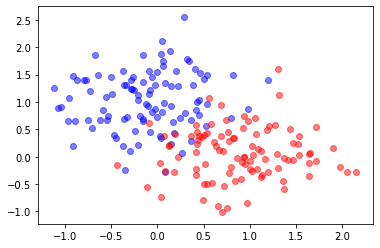

In [24]:
n=100
plt.scatter(x_train[:n,0],x_train[:n,1],color="blue",alpha=0.5)
plt.scatter(x_train[n:,0],x_train[n:,1],color="red",alpha=0.5)

In [29]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [30]:
knn.predict(x_test)

array([0, 0, 0, ..., 1, 1, 1])

In [35]:
from sklearn.neighbors import KNeighborsRegressor